In [2]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 12. 고유값 분해

## 12.1 고유값과 고유벡터의 해석

### 12.1.1 고유값과 고유벡터의 기하학적 해석

행렬과 벡터를 특수하게 결합하면 행렬이 벡터를 늘리기는 하지만 회전시키지는 않는다

동일한 벡터에 대해 행렬이 미치는 효과는 스칼라가 미치는 효과와 동일하다는 뜻입니다.

식 12-1 고유값 방정식  

$Av=\lambda v$  

Geometry of eigenvectors

[-0.61803399  1.61803399]
[[-0.93417236 -0.35682209]
 [-0.35682209 -0.93417236]]


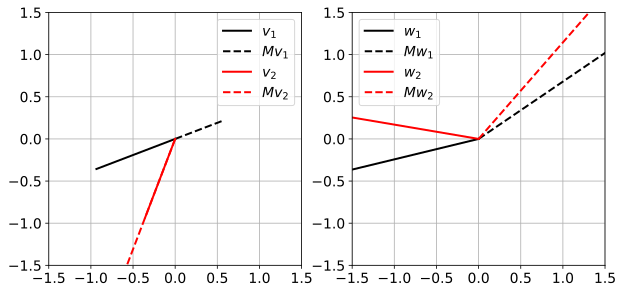

In [4]:
# in 2D of course, for visualization

# the matrix
M = np.array([ [-1,1],
               [-1,2] ])

# its eigenvalues and eigenvectors
eigenvalues,eigenvectors = np.linalg.eig(M)
print(eigenvalues)
print(eigenvectors)

# some random vectors
notEigenvectors = np.random.randn(2,2)

# multipy to create new vectors
Mv = M @ eigenvectors
Mw = M @ notEigenvectors



## and now plot
_,axs = plt.subplots(1,2,figsize=(10,6))

# the two eigenvectors
axs[0].plot([0,eigenvectors[0,0]],[0,eigenvectors[1,0]],'k',linewidth=2,label='$v_1$')
axs[0].plot([0,Mv[0,0]],[0,Mv[1,0]],'k--',linewidth=2,label='$Mv_1$')

axs[0].plot([0,eigenvectors[0,1]],[0,eigenvectors[1,1]],'r',linewidth=2,label='$v_2$')
axs[0].plot([0,Mv[0,1]],[0,Mv[1,1]],'r--',linewidth=2,label='$Mv_2$')

# the two non-eigenvectors
axs[1].plot([0,notEigenvectors[0,0]],[0,notEigenvectors[1,0]],'k',linewidth=2,label='$w_1$')
axs[1].plot([0,Mw[0,0]],[0,Mw[1,0]],'k--',linewidth=2,label='$Mw_1$')

axs[1].plot([0,notEigenvectors[0,1]],[0,notEigenvectors[1,1]],'r',linewidth=2,label='$w_2$')
axs[1].plot([0,Mw[0,1]],[0,Mw[1,1]],'r--',linewidth=2,label='$Mw_2$')


# adjust the graphs a bit
for i in range(2):
  axs[i].axis('square')
  axs[i].set_xlim([-1.5,1.5])
  axs[i].set_ylim([-1.5,1.5])
  axs[i].grid()
  axs[i].legend()

plt.savefig('Figure_12_01.png',dpi=300)
plt.show()

### 12.1.2 통계(주성분 분석)

<img src='images/fig_12_02.png' width = 600>

### 12.1.3 잡음 감쇠

- 무작위 잡음을 줄이는 한가지 방법은 시스템의 고유값과 고유벡터를 식별한 다음 작은 고유값과 관련된 데이터
공간에서 방향을 투영하는 것입니다.  
- 즉 무작위 잡음이 전체 분산에 기여하는 바가 상대적으로 작다고 가정합니다.  
- 데이터 차원을 투영한다는 것은 임계값보다 낮은 일부 고유값을 0으로 설정한 후 데이터 집합을 재구성하는 것을 의미합니다.

### 12.1.4 차원 축소(데이터 압축)

압축 - 데이터 품질에 미치는 영향을 최소화하면서 데이터 크기를 줄이는 것을 의미  
TIFF 10MB, JPG 0.1MB

데이터 집합의 차원을 줄이는 한 가지 방법은 먼저 고유값 분해를 수행한 다음,  
데이터의 공간의 작은 방향과 연관된 고유값과 고유벡터를 삭제하고 상대적으로 큰 고유벡터와 고유값
쌍만 전송하는 것입니다.  
실제로 이 방식과 동일한 원리인 SVD를 데이터 압축에 더 많이 사용합니다.

모든 데이터 압축은 데이터 집합을 데이터의 가장 중요한 특성을 나타내는 기준벡터 집합으로 분해한 다음  
원본 데이터의 고품질 형태로 재구성하는 것입니다.

## 12.2 고유값 구하기

Finding eigenvalues

In [41]:
matrix = np.array([
             [1,2],
             [3,4]
             ])

# 고유값 구하기
evals = np.linalg.eig(matrix)[0]
evals

array([-0.37228132,  5.37228132])

In [42]:
# Finding eigenvectors
evals,evecs = np.linalg.eig(matrix)
print(evals), print(' ')
print(evecs)

[-0.37228132  5.37228132]
 
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


식 12-2 재구성된 고유값 방정식

$Av=\lambda v$  
$Av - \lambda v = 0$  
$(A - \lambda I) v = 0$  

- 고유벡터가 고유값에 의해 이동된 행렬의 영공간에 존재한다는 것을 의미
- 이는 고유값에 의해 이동된 행렬이 특이행렬이라는 것을 의미한다.  
- 특이 행렬만이 자명하지 않은 영공간을 갖기 때문이다

행렬의 고유값 구하기  

행렬의 특성 다항식  
$|A - \lambda I| = 0$  

이동된 행렬의 행렬식을 0으로 설정하고 미지의 고유값을 구합니다.

## 12.3 고유벡터 찾기

Finding eigenvectors

In [43]:
# same matrix as above
evals,evecs = np.linalg.eig(matrix)

print('List of eigenvalues:')
print(evals)

print(f'\nMatrix of eigenvectors (in the columns!):')
print(evecs)

List of eigenvalues:
[-0.37228132  5.37228132]

Matrix of eigenvectors (in the columns!):
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


출처 https://angeloyeo.github.io/2019/07/17/eigen_vector.html

<img src='images/fig_12_03_1.png' width = 1000>  
<img src='images/fig_12_03_2.png' width = 1000>  

영공간 벡터는 가우스-조던을 사용하여 연립방정식을 풀면 구할 수 있다.  
여기서 계수 행렬은 $\lambda$ 만큼 이동된 행렬이고 상수벡터는 영벡터이다.  
실제 구현에서는 QR분해와 거듭제곱법이라고 하는 과정 등을 통해 
고유값과 고유벡터를 찾는데 보다 수치적으로 안정적인 방법을 적용합니다.

### 12.3.1 고유벡터의 부호와 크기 불확정성

실제로 고유벡터는 크기가 아닌 방향 때문에 중요함

즉 $v$가 고유벡터라면 0을 제외한 모든 실수값 $\alpha$ 에 대해 $\alpha v$도 고유벡터

## 12.4 정방 행렬의 대각화

$AV = V\Lambda$  
정방행렬의 대각화  

$A = V\Lambda V^{-1}$  
행렬 $A$가 $V$의 공간 내부에서 대각화된다는 것을 보여준다.  
즉 $V$는 우리를 대각선 공간으로 이동시키고 $V^{-1}$은 우리를 대각선공간에서 다시 나오게 한다

행렬 $A$는 표준 기저에서는 밀도가 높지만 일련의 변환($V$)을 적용하면 새로운 기저벡터(고유벡터)  
집합이 됩니다. 이는 정보가 거의 없으며 대각행렬로 표현됩니다.  

방정식의 표준 기저 공간으로 돌아가야 하므로 $V^{-1}$을 사용해야 합니다. 

Diagonalizing a matrix

In [44]:
matrix = np.array([
             [1,2],
             [3,4]
             ])

# 고유값 구하기
evals = np.linalg.eig(matrix)[0]
evals

array([-0.37228132,  5.37228132])

In [45]:
# Finding eigenvectors
evals,evecs = np.linalg.eig(matrix)
print(evals), print(' ')
print(evecs)

[-0.37228132  5.37228132]
 
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [46]:
# using variables created above
D = np.diag(evals)
D

array([[-0.37228132,  0.        ],
       [ 0.        ,  5.37228132]])

In [47]:
# confirm the matrix eigenvalue equation:
LHS = matrix @ evecs
RHS = evecs @ D


# print out the two sides of the equation
print('Left-hand side:')
print(LHS)

print(f'\nRight-hand side:')
print(RHS)

Left-hand side:
[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]

Right-hand side:
[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]


## 12.5 대칭 행렬의 특별함

Special properties of symmetric matrices

In [48]:
# 무작위 행렬
A = np.random.randint(-3,4,(3,3))

# 대칭행렬로 만듬
A = A.T@A

# 위 행렬의 고유값 분해
L,V = np.linalg.eig(A)

# all pairwise dot products
print( np.dot(V[:,0],V[:,1]) )
print( np.dot(V[:,0],V[:,2]) )
print( np.dot(V[:,1],V[:,2]) )

-2.344088924379725e-16
-3.886698291161616e-17
3.3528633766069145e-16


직교 고유 벡터 특성은 모든 고유벡터 쌍 사이의 내적이 0이고 고유벡터 자체와의 내적은 0이 아니라는 것을 의미한다  
이는 $V^{T}V=D$로 나타낼 수 있으며 여기서 D는 고유벡터 노름을 포함하는 대각 행렬이다.

모든 고유벡터가 단위 길이를 갖도록 크기를 조정했을 때 고유벡터는 아래를 성립한다.  

$V^{T}V=I$  

즉 대칭 행렬의 고유벡터 행렬은 직교행렬이다

In [49]:
# show that V'V=I
np.round( V.T@V ,10) # rounded for visibility (precision errors...)

array([[ 1., -0., -0.],
       [-0.,  1.,  0.],
       [-0.,  0.,  1.]])

### 12.5.2 실수 고유값

대칭행렬의 두번째 특성은 행렬이 실수 고유값(따라서 실수값 고유벡터)을 갖는다는 것입니다

복소수 고유값

In [50]:
# real-valued matrix with complex-valued eigenvalues

# a matrix
A = np.array([[-3, -3, 0],
              [ 3, -2, 3],
              [ 0,  1, 2]])


# btw, random matrices often have complex eigenvalues (though this is not guaranteed):
#A = np.random.randint(-3,4,(3,3))

# its eigendecomposition
L,V = np.linalg.eig(A)
L.reshape(-1,1) # print as column vector

array([[-2.744739  +2.85172624j],
       [-2.744739  -2.85172624j],
       [ 2.48947801+0.j        ]])

대칭행렬의 실수 고유값

In [51]:
# repeat for symmetric matrices

# a matrix
A = np.array([[-3, -3, 0],
              [-3, -2, 1],
              [ 0,  1, 2]])


# you can also demonstrate this with random symmetric matrices
#A = np.random.randint(-3,4,(3,3))
#A = A.T@A

# its eigendecomposition
L,V = np.linalg.eig(A)
L.reshape(-1,1) # print as column vector

array([[-5.59707146],
       [ 0.22606174],
       [ 2.37100972]])

## 12.6 특이 행렬의 고유값 분해

Eigendecomposition of singular matrices

In [52]:
# a singular matrix
A = np.array([[1,4,7],
              [2,5,8],
              [3,6,9]])

# its eigendecomposition
L,V = np.linalg.eig(A)


# print its rank...
print( f'Rank = {np.linalg.matrix_rank(A)}\n' )

# ... and its eigendecomposition
print('Eigenvalues: ')
print(L.round(2)), print(' ')

print('Eigenvectors:')
print(V.round(2))

Rank = 2

Eigenvalues: 
[16.12 -1.12 -0.  ]
 
Eigenvectors:
[[-0.46 -0.88  0.41]
 [-0.57 -0.24 -0.82]
 [-0.68  0.4   0.41]]


위 rank-2 인 행렬은 하나의 0이 아닌 고유값을 가진다

In [53]:
# FYI, random singular matrix
M = np.random.randn(5,3) @ np.random.randn(3,5)
M = M.T@M # make it symmetric for real-valued eigenvalues

# print its eigenvalues (rounded and columnized for clarity)
np.linalg.eig(M)[0].reshape(-1,1).round(3)

array([[22.273],
       [ 1.391],
       [ 0.709],
       [-0.   ],
       [ 0.   ]])

(1) 고유값 분해는 축소계수 행렬에 유효  
(2) 고유값 0이 하나 이상 존재하면 축소계수 행렬이다

## 12.7 이차식, 정부호성 및 고유값

Quadratic form

<img src='images/fig_12_05_1.png' width = 600>   

<img src='images/fig_12_05_2.png' width = 600>   

<img src='images/fig_12_05_3.png' width = 600>   

In [54]:
import numpy as np

# a matrix with only positive quad.form values
A = np.array([ [2,4],[0,3] ])
print('Eigenvalues: ')
print(np.linalg.eig(A)[0])

# print the quadratic form for some random vectors
x,y = np.random.randn(2)
print(f'\nSome random quadratic form result:')
A[0,0]*x**2 + (A[1,0]+A[0,1])*x*y + A[1,1]*y**2

Eigenvalues: 
[2. 3.]

Some random quadratic form result:


6.985976775358422

In [55]:
# a matrix with both positive and negative quad.form values
A = np.array([ [-9,4],[3,9] ])
print('Eigenvalues: ')
print(np.linalg.eig(A)[0])

# print the quadratic form for some random vectors
x,y = np.random.randn(2)
print(f'\nSome random quadratic form result:')
A[0,0]*x**2 + (A[1,0]+A[0,1])*x*y + A[1,1]*y**2

Eigenvalues: 
[-9.64365076  9.64365076]

Some random quadratic form result:


-61.40093927221705

### 12.7.2 정부호성

정부호성은 정방행렬의 특성으로 행렬의 고유값의 부호에 의해 정의됩니다.  
이는 이차식의 결과의 부호와 동일합니다.  
또한 행렬의 가역성은 물론 일반화된 고유값 분해(다변량 선형분류기 및 신호처리)와 같은 
고급 데이터 분석방법에도 중요한 의미를 갖습니다.

<img src='images/fig_12_06.png' width = 600>   

### 12.7.3 $A^{T}A$는 양의 (준)정부호

행렬과 그 전치의 곱으로 표현할 수 있는 모든 행렬(즉 $S=A^{T}A$)는 양의 정부호 또는 양의 준정부호가 보장됩니다.  
이 두 범주를 묶어 '양의 (준)정부호'라고 표기하기도 합니다.


모든 데이터 공분산 행렬은 데이터 행렬에 그 전치를 곱한 값으로 정의되기 때문에 양의 (준)정부호 입니다.   
즉 모든 공분산 행렬은 음이 아닌 고유값을 갖습니다.   
데이터 행렬이 최대계수 라면 고유값은 모두 양수이며 데이터 행렬이 축소계수인 경우 고유값이 0인 값이 하나 이상 존재합니다.

<img src='images/fig_12_07.png' width = 600>   

요점은 $A^{T}A$의 이차식은 행렬의 제곱에 벡터를 곱한 값과 같다는 것으로 크기가 음수가 될 수 없으며 벡터가 0일 때만 0이 될 수 있습니다.  
그리고 w에 대해 $Aw = 0$이면 A는 특이행렬입니다.

## 12.8 일반화된 고유값 분해

Generalized eigendecomposition

일반화된 고유값 분해는 단위 행렬을 다른 행렬로 대체하는 것을 포함합니다.

$Av = \lambda Iv$  
$Av = \lambda Bv$

일반화된 고유값 분해는 두행렬의 동시 대각화 라고도 합니다.  
두 행렬은 고유값과 고유벡터 쌍을 공유합니다

개념적으로 일반화된 고유값 분해는 곱 행렬의 '정규화된' 고유값 분해로 생각할 수 있습니다.

$C = AB^{-1}$  
$Cv = \lambda v$  

항상 두 행렬을 동시에 대각화할 수 있는 것은 아닙니다.  
그러나 B가 양의 (준)정부호라면 가능합니다.

In [56]:
n = 4

# create symmetric matrices
A = np.random.randn(n,n)
A = A.T@A

# impose a correlation between the two matrices (this improves numerical stability of the simultaneousl diagonalization)
B = np.random.randn(n,n)
B = B.T@B + A/10


# using scipy
from scipy.linalg import eigh
evals,evecs = eigh(A,B)
evals

array([0.01746103, 0.90631291, 2.36597828, 7.06908013])

In [57]:
evecs

array([[ 0.32075429, -0.07187298,  0.3708121 , -0.0849254 ],
       [ 0.16660368, -0.28579568, -0.55072613,  0.07336291],
       [ 0.24472854, -0.25547648, -0.36389703,  0.80125847],
       [-0.01484406,  1.21566974, -0.36220277, -0.89745205]])

데이터 과학에서는 분류 분석에 일반화된 고유값 분해가 사용됩니다.  
특히 피셔의 선형판별분석(LDA)는 두 데이터 공분산 행렬의 일반화된 고유값 분해를 기반으로 합니다.

# Exercise 1

$A^{-1}$의 고유벡터는 A의 고유벡터와 같고, 고유값은 $\lambda^{-1}$

In [58]:
# create the matrix
A = np.random.randn(5,5)
A = A.T@A

# compute its inverse
Ai = np.linalg.inv(A)

# eigenvalues of A and Ai
eigvals_A  = np.linalg.eig(A)[0]
eigvals_Ai = np.linalg.eig(Ai)[0]

# compare them (hint: sorting helps!)
print('Eigenvalues of A:')
print(np.sort(eigvals_A))

print(' ')
print('Eigenvalues of inv(A):')
print(np.sort(eigvals_Ai))

print(' ')
print('Reciprocal of evals of inv(A):')
print(np.sort(1/eigvals_Ai))

Eigenvalues of A:
[ 0.35297487  1.20556494  4.02075212  7.85742481 14.87846317]
 
Eigenvalues of inv(A):
[0.06721124 0.12726816 0.24870969 0.82948663 2.83306288]
 
Reciprocal of evals of inv(A):
[ 0.35297487  1.20556494  4.02075212  7.85742481 14.87846317]


# Exercise 2

그림[12-1]의 V의 열 대신 행을 사용, 코딩 오류  
단순히 행렬에 고유벡터를 곱하면 늘어나기만 한다는 기하학적 테스트에서 실패

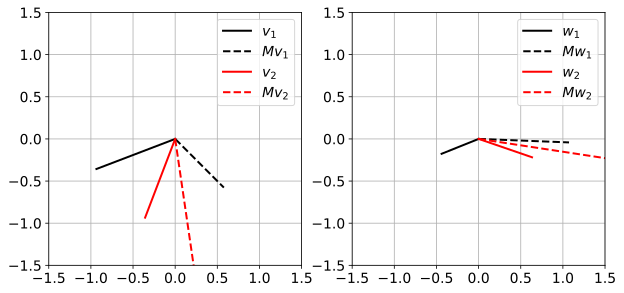

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# the matrix
M = np.array([ [-1,1],
               [-1,2] ])

# its eigenvalues and eigenvectors
eigenvalues,eigenvectors = np.linalg.eig(M)

# some random vectors
notEigenvectors = np.random.randn(2,2)

# multipy to create new vectors
Mv = M @ eigenvectors
Mw = M @ notEigenvectors



## and now plot
_,axs = plt.subplots(1,2,figsize=(10,6))

# # the two eigenvectors
# axs[0].plot([0,eigenvectors[0,0]],[0,eigenvectors[1,0]],'k',linewidth=2,label='$v_1$')
# axs[0].plot([0,Mv[0,0]],[0,Mv[1,0]],'k--',linewidth=2,label='$Mv_1$')

# axs[0].plot([0,eigenvectors[0,1]],[0,eigenvectors[1,1]],'r',linewidth=2,label='$v_2$')
# axs[0].plot([0,Mv[0,1]],[0,Mv[1,1]],'r--',linewidth=2,label='$Mv_2$')

# # the two non-eigenvectors
# axs[1].plot([0,notEigenvectors[0,0]],[0,notEigenvectors[1,0]],'k',linewidth=2,label='$w_1$')
# axs[1].plot([0,Mw[0,0]],[0,Mw[1,0]],'k--',linewidth=2,label='$Mw_1$')

# axs[1].plot([0,notEigenvectors[0,1]],[0,notEigenvectors[1,1]],'r',linewidth=2,label='$w_2$')
# axs[1].plot([0,Mw[0,1]],[0,Mw[1,1]],'r--',linewidth=2,label='$Mw_2$')

# the two eigenvectors
axs[0].plot([0,eigenvectors[0,0]],[0,eigenvectors[0,1]],'k',linewidth=2,label='$v_1$')
axs[0].plot([0,Mv[0,0]],[0,Mv[0,1]],'k--',linewidth=2,label='$Mv_1$')

axs[0].plot([0,eigenvectors[1,0]],[0,eigenvectors[1,1]],'r',linewidth=2,label='$v_2$')
axs[0].plot([0,Mv[1,0]],[0,Mv[1,1]],'r--',linewidth=2,label='$Mv_2$')

# the two non-eigenvectors
axs[1].plot([0,notEigenvectors[0,0]],[0,notEigenvectors[0,1]],'k',linewidth=2,label='$w_1$')
axs[1].plot([0,Mw[0,0]],[0,Mw[0,1]],'k--',linewidth=2,label='$Mw_1$')

axs[1].plot([0,notEigenvectors[1,0]],[0,notEigenvectors[1,1]],'r',linewidth=2,label='$w_2$')
axs[1].plot([0,Mw[1,0]],[0,Mw[1,1]],'r--',linewidth=2,label='$Mw_2$')


# adjust the graphs a bit
for i in range(2):
  axs[i].axis('square')
  axs[i].set_xlim([-1.5,1.5])
  axs[i].set_ylim([-1.5,1.5])
  axs[i].grid()
  axs[i].legend()

plt.show()

# Exercise 3

고유값이 고유벡터와 불가분의 관계에 있음을 증명  
덧셈법(연습문제4-9)을 사용하여 생성한 대칭 난수 정수 행렬을 대각화하되  
고유벡터의 순서를 바꾸지 않고 고유값의 순서를 무작위로 바꿉니다.

먼저 행렬을 $V^{-1}\Lambda V$로 재구성할 수 있음을 증명, 프로베니우스 거리 활용

In [17]:
# instructions don't specify matrix size; I'll use n=5
N = 5

# to store the reconstruction accuracies
reconAcc = np.zeros(4)


# Create a symmetric random-integers matrix
A = np.random.randn(N,N)
A = np.round( A.T+A )
# print(A)

# diagonalize the matrix
d,V  = np.linalg.eig(A)
D    = np.diag(d)

# demonstrate reconstruction accuracy
# remember that inv(V)=V.T!

print(np.allclose(A @ V, V @ D))
Arecon = V @ D @ V.T
print(np.round( A-Arecon ,4))

reconAcc[0] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[0]}')

True
[[ 0.  0.  0. -0.  0.]
 [ 0.  0.  0. -0. -0.]
 [ 0.  0. -0. -0.  0.]
 [-0. -0.  0. -0.  0.]
 [ 0. -0.  0.  0. -0.]]

Frobenius distance: 3.2605418710725893e-15


다음으로 $\tilde{\Lambda}$를 사용하여 행렬을 재구성

In [22]:
d

array([-3.42409418, -1.69348103,  4.23275108,  1.25481111,  2.63001302])

In [18]:
# create D-tilde
Dtild = np.diag( d[np.random.permutation(N)] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[1] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[1]}')

[[ 1.9095 -1.2637 -0.1672  2.8271 -0.4519]
 [-1.2637 -0.6178  3.4756  1.2242 -4.7958]
 [-0.1672  3.4756  0.1588  0.8829  1.8979]
 [ 2.8271  1.2242  0.8829 -3.7141  1.8706]
 [-0.4519 -4.7958  1.8979  1.8706  2.2635]]

Frobenius distance: 11.468768325049526


가장 큰 두개의 고유값만 바꾸면?

In [19]:
### swap only the two largest eigenvalues
evals_sort_idx = np.argsort(d) # note: default is to sort 
i = evals_sort_idx[np.r_[np.arange(N-2),N-1,N-2]][::-1]

# create D-tilde
Dtild = np.diag( d[i] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[2] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[2]}')

[[ 1.8955 -0.8781 -0.5018  2.9355 -0.1989]
 [-0.8781 -0.2252  3.4419  0.322  -4.4429]
 [-0.5018  3.4419 -0.0698  1.7237  1.7959]
 [ 2.9355  0.322   1.7237 -4.159   1.2965]
 [-0.1989 -4.4429  1.7959  1.2965  2.5584]]

Frobenius distance: 11.224313242336256


가장 작은 두개의 고유값만 바꾸면?

In [20]:
### swap only the two smallest eigenvalues
evals_sort_idx = np.argsort(d) # note: default is to sort 
i = evals_sort_idx[np.r_[1,0,np.arange(2,N)]][::-1]

# create D-tilde
Dtild = np.diag( d[i] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[3] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[3]}')

[[ 2.6035 -1.3125 -0.7961  2.8424 -1.177 ]
 [-1.3125 -1.1861  3.5778  1.3257 -3.8409]
 [-0.7961  3.5778  0.7227  0.8587  2.4631]
 [ 2.8424  1.3257  0.8587 -3.7321  1.6926]
 [-1.177  -3.8409  2.4631  1.6926  1.592 ]]

Frobenius distance: 11.25934109481505


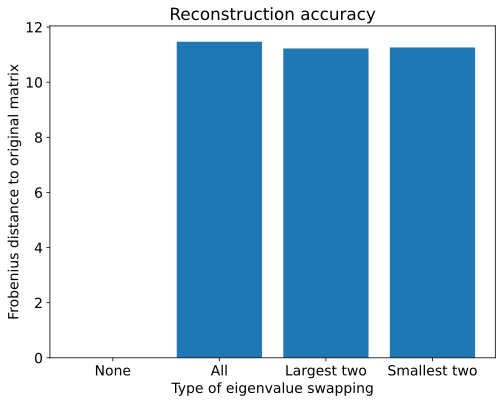

In [21]:
# now for the plot

plt.figure(figsize=(8,6))

plt.bar(range(4),reconAcc)
plt.xticks(range(4),labels=['None','All','Largest two','Smallest two'])
plt.ylabel('Frobenius distance to original matrix')
plt.xlabel('Type of eigenvalue swapping')
plt.title('Reconstruction accuracy')

plt.savefig('Figure_12_03.png',dpi=300)
plt.show()

# Exercise 4

무작위 행렬의 흥미로운 특성은 복소수 고유값이 행렬의 크기에 비례하는 반지름을 가진 원안에 분포한다는 것이다

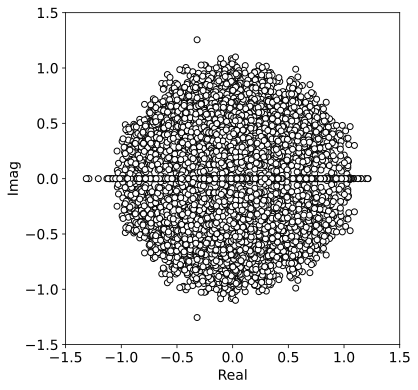

In [33]:
import random
nIter = 123
matsize = 42
evals = np.zeros((nIter,matsize),dtype=complex)

# create the matrices and get their scaled eigenvalues
for i in range(nIter):
  A = np.random.randn(matsize,matsize)
  # A = np.random.uniform(-1,1, (matsize,matsize))
  # evals[i,:] = np.linalg.eig(A)[0] / np.sqrt(matsize)
  evals[i,:] = np.linalg.eig(A)[0] / np.sqrt(matsize)



# and show in a plot
plt.figure(figsize=(6,6))

plt.plot(np.real(evals),np.imag(evals),'ko',markerfacecolor='white')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel('Real')
plt.ylabel('Imag')
plt.savefig('Figure_12_04.png',dpi=300)
plt.show()

# Exercise 5

고유벡터가 고유값으로 이동된 행렬의 영공간의 기저가 된다는 것을 이해하고,  
수치 정밀도 오류의 위험도 알 수 있다

- 무작위 3 x 3 대칭 행렬을 고유값 분해
- 고유값에 대해 scipy.linalg.null_space()사용하여 이동된 각 행렬의 영공간에 대한 기저벡터를 찾기
- 이 벡터는 고유벡터와 동일한가?

다른 무작위 행렬에 대해 코드를 여러 번 실행하면 파이썬 오류가 발생할 수 있다.  
이 오류는 $\lambda$만큼 이동된 행렬의 빈 영공간에서 발생하는데 그 이유는 이동된 행렬이 완전 계수기기 때문에 발생한다.

In [66]:
# get the null_space function from scipy
import numpy as np
from scipy.linalg import null_space


# Create a symmetric matrix
N = 3
A = np.random.randn(N,N)
A = A@A.T

# eigendecompose
evals,evecs = np.linalg.eig(A)

# compare the eigenvectors with N(A-lI)
for i in range(N):

  # get the null space vector of the shifted matrix
  nullV = null_space( A-evals[i]*np.eye(N) )

  # check for a match with the eigenvector via correlation (normalizes for magnitudes)
  r = np.corrcoef(nullV.T,evecs[[i],:])[0,1]

  # and print (abs(r))
  print(f'Correlation between N(A-lI) and evec {i}: {np.abs(r):.2f}')
  print(nullV.T)
  print(evecs[[i],:])

Correlation between N(A-lI) and evec 0: 0.97
[[ 0.96959188  0.22691647 -0.09165423]]
[[-0.96959188 -0.19368497 -0.14959183]]
Correlation between N(A-lI) and evec 1: 0.33
[[-0.19368497  0.48259103 -0.85416159]]
[[-0.22691647  0.48259103  0.84594019]]
Correlation between N(A-lI) and evec 2: 0.53
[[ 0.14959183 -0.84594019 -0.51186665]]
[[ 0.09165423 -0.85416159  0.51186665]]


# Exercise 6

무작위 대칭 행렬을 만드는 세번째 방법  
- 먼저 대각선에 양수가 있는 4x4 대각행렬을 만듬  
- 난수 행렬의 QR분해를 이용해 4x4 Q 행렬을 만듬  
- 이 행렬을 고유값과 고유벡터로 사용하고 적절하게 곱하여 행렬을 조립함  
- 조립된 행렬이 대칭인지 행렬의 고유값이 지정한 고유값과 동일한지 확인

In [67]:
# Create the Lambda matrix with positive values
Lambda = np.diag( np.random.rand(4)*5 )

# create Q
Q,_ = np.linalg.qr( np.random.randn(4,4) )

# reconstruct to a matrix
A = Q @ Lambda @ Q.T

# the matrix minus its transpose should be zeros (within precision error)
np.round( A-A.T ,5)

array([[ 0., -0.,  0.,  0.],
       [ 0.,  0., -0.,  0.],
       [ 0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0.]])

In [68]:
# check eigenvalues against Lambda (sorting is helpful!)
print(np.sort(np.diag(Lambda)))
print(np.sort(np.linalg.eig(A)[0]))

[2.57872726 2.69292575 3.71893845 4.79009634]
[2.57872726 2.69292575 3.71893845 4.79009634]


# Exercise 7

In [69]:
# Refer back to the code for Chapter 11, exercise 4.

연습문제 11-4를 다시 살펴봅시다. 이 연습문제를 다시 수행하되 설계행렬의 제곱 프로베니우스 노름 대신   
고유값의 평균을 사용합니다. 이를 수축 정규화라고 합니다.  
결과값은 11장의 값과 어떤 차이가 있을까요?

# Exercise 8

지정된 상관관계 행렬을 사용하여 대리 데이터를 생성한 다음  
다음 연습문제에서 상관관계를 제거합니다.

$ Y = V\Lambda^{1/2}X$

여시서 상관관계 행렬의 고유벡터와 고유값이며, X는 상관관계가 없는 난수  
N채널과 T시점의 N x T 행렬입니다.

이 공식을 적용하여 다음과 같은 상과관계 구조를 가진 3 x 10000개의 데이터 행렬 Y를 만듭니다.

R = np.array([   
[ 1,.2,.9],    
[.2, 1,.3],  
[.9,.3, 1]   
])  

그런 다음 데이터 행렬 X의 경험적 상관관계 행렬을 계산합니다.  
R과 상당히 유사해야 합니다.

In [70]:
# correlation matrix
R = np.array([[ 1,.2,.9],
              [.2, 1,.3],
              [.9,.3, 1] ])

# eigendecomposition
d,V = np.linalg.eig(R)
D = np.diag(d)

# create new data with imposed correlation
X = V @ np.sqrt(D) @ np.random.randn(3,10000)

np.corrcoef(X)

array([[1.        , 0.20270748, 0.89475979],
       [0.20270748, 1.        , 0.31097673],
       [0.89475979, 0.31097673, 1.        ]])

# Exercise 9

백색화 하여 부관된 상관관계를 제거해 보겠습니다.  

$ Y = Y^{T}V\Lambda^{-1/2}X$

이전 데이터 행렬에 해당 공식을 적용하고 상관관계 행렬이 단위 행렬인지 확인합니다.

In [71]:
# now whiten
Y = X.T @ V @ np.linalg.inv(np.sqrt(D))

# and check the correlations
np.round( np.corrcoef(Y.T) ,3)

array([[ 1.   , -0.   ,  0.02 ],
       [-0.   ,  1.   , -0.016],
       [ 0.02 , -0.016,  1.   ]])

# Exercise 10

일반화된 고유값 분해에서는 두 행렬이 대칭인 경우에도 고유벡터는 직교하지 않습니다.  
이는 A와 B가 모두 대칭이지만 C = AB 가 대칭이 아니기 때문에 발생합니다.  
그러나 고유벡터는 B에 대해 직교하므로 $V^{T}BV=I$가 됩니다.  
두 대칭 행렬에 대해 일반화된 고유값 분해를 수행하여 확인합니다.

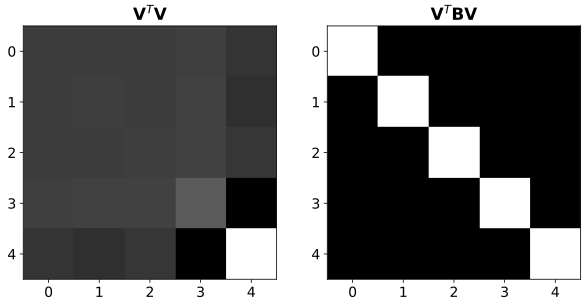

In [78]:
# two symmetric matrices and GED
n = 5
A = np.random.randn(n,n)
A = A.T@A
B = np.random.randn(n,n)
B = B.T@B

evals,evecs = eigh( A,B )

# eigenvectors times their transposes
VV  = evecs.T @ evecs
VBV = evecs.T @ B @ evecs


# show in an image
_,axs = plt.subplots(1,2,figsize=(10,6))

axs[0].imshow(VV,cmap='gray')
axs[0].set_title('$\mathbf{V}^T\mathbf{V}$')

axs[1].imshow(VBV,cmap='gray')
axs[1].set_title('$\mathbf{V}^T\mathbf{B}\mathbf{V}$')

plt.savefig('Figure_12_05.png',dpi=300)
plt.show()

# Exercise 11

고유벡터의 크기조정에 대해 살펴봅시다.  
고유벡터 행렬에 pi를 곱하고, 재구성된 행렬의 정확도 또는 고유벡터의 노름에 영향을 줄까요?

In [79]:
# create the matrix
A = np.random.randint(-14,15,(4,4))


# diagonalize
d,V = np.linalg.eig(A)
V   = V*np.pi
D   = np.diag(d)
Vi  = np.linalg.inv(V)


# test for accurate reconstruction
print('Reconstructed minus original:')
print( np.round(V@D@Vi - A,3) )
print(' ')

# norms of the eigenvectors
for i in range(A.shape[0]):
  norm = np.sqrt(np.sum(V[:,i]*np.conj(V[:,i])))
  print(f'Eigenvector {i} has norm {norm}')


# Discussion: Scaling V doesn't matter because that scalar is normalized out in the matrix inverse.

Reconstructed minus original:
[[-0.-0.j -0.-0.j -0.-0.j  0.-0.j]
 [-0.-0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.-0.j -0.-0.j  0.-0.j  0.+0.j]
 [-0.+0.j -0.+0.j  0.+0.j -0.+0.j]]
 
Eigenvector 0 has norm (3.1415926535897922+0j)
Eigenvector 1 has norm (3.1415926535897922+0j)
Eigenvector 2 has norm (3.141592653589793+0j)
Eigenvector 3 has norm (3.141592653589793+0j)


In [80]:
## repeat for a symmetric matrix using V' instead of inv(V)
# create the matrix
A = np.random.randint(-14,15,(4,4))
A = A.T@A


# diagonalize
d,V = np.linalg.eig(A)
V = V*np.pi
D = np.diag(d)
Vi = V.T


# test for accurate reconstruction
print('Reconstructed minus original:')
print( np.round(V@D@Vi - A,3) )
print(' ')

# norms of the eigenvectors
for i in range(A.shape[0]):
  norm = np.sqrt(np.sum(V[:,i]*np.conj(V[:,i])))
  print(f'Eigenvector {i} has norm {norm}')


# Discussion: Scaling V *does* matter because V is not explicitly inverted!

Reconstructed minus original:
[[ 3148.71  -2909.23  -1357.049  1303.832]
 [-2909.23   3219.666  1206.266 -1268.353]
 [-1357.049  1206.266  2616.533  -523.307]
 [ 1303.832 -1268.353  -523.307  1428.006]]
 
Eigenvector 0 has norm 3.141592653589793
Eigenvector 1 has norm 3.141592653589793
Eigenvector 2 has norm 3.141592653589793
Eigenvector 3 has norm 3.141592653589793
